In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./Datasets/50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dummy_var = pd.get_dummies(df.State)
dummy_var

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [10]:
df = pd.concat([df, dummy_var], axis = 'columns')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [11]:
df = df.drop(['State'], axis = 'columns')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [12]:
X = df.iloc[:, :]
y = df.iloc[:, 3]

X = X.drop(['Profit'], axis = 1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

print(x_train.shape)
print(y_train.shape)
# print(y_train.ndims)

(33, 6)
(33,)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm

LinearRegression()

In [17]:
y_pred = lm.predict(x_test)
y_pred

array([111616.64259451, 132709.39466316, 140155.11033793,  76099.20398184,
       186329.94240372, 112822.19807255,  63002.00394804,  99107.10428091,
       119287.75473383, 175522.83864739, 101000.698615  ,  85772.99293235,
       117713.76481525,  90230.88085201, 133375.04389452, 167530.54765828,
       158013.54602063])

In [26]:
print(y_test)

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
Name: Profit, dtype: float64


In [19]:
lm.score(X, y)

0.9416843347867826

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

118348525.66956913

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred )
print(score*100)


87.5265528574831


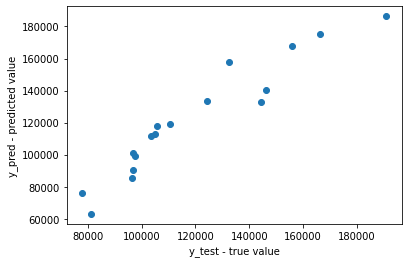

In [30]:
plt.scatter(y_test, y_pred, marker='o')
plt.xlabel('y_test - true value')
plt.ylabel('y_pred - predicted value')
plt.show()

# Using LabelEncoder

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('./Datasets/50_startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data.State = encoder.fit_transform(data.State)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [38]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


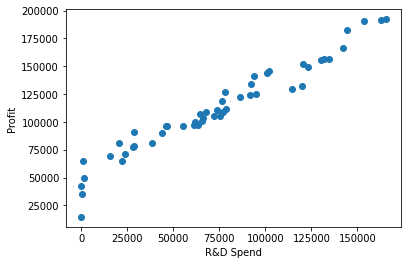

In [43]:
plt.scatter(data['R&D Spend'], data['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel("Profit")
plt.show()

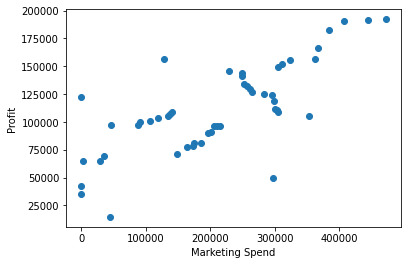

In [44]:
plt.scatter(data['Marketing Spend'], data['Profit'])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

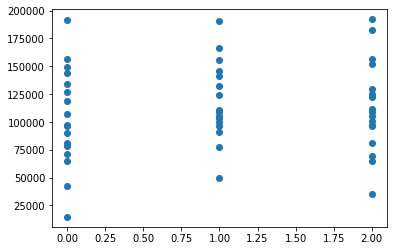

In [47]:
plt.scatter(data['State'], data['Profit'])
plt.show()

In [45]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [46]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [49]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

print(x_train.shape)
print(y_train.shape)

(33, 4)
(33,)


In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)


LinearRegression()

In [52]:
y_pred = model.predict(x_test)
y_pred

array([106297.1559122 , 132904.27872236, 134361.58710323,  71525.22141725,
       180646.71168968, 115272.25765045,  64968.1291104 ,  99747.78413507,
       114942.27512777, 169715.63824632,  96252.33544563,  87361.99850436,
       112029.77141581,  91957.32009613, 128434.04902663, 162033.10924329,
       152286.18696423])

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("r2 score", r2*100)
print("mse:", mse)

r2 score 91.18239677528183
mse: 83661743.99597976


In [54]:
model.score(X, y)

0.947407556485261

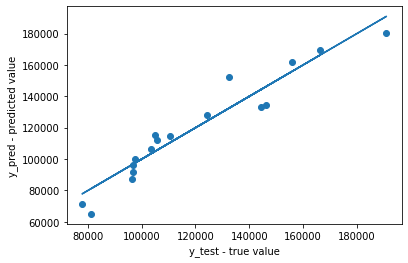

In [56]:
plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, y_test)           #draws the line that can show the difference between actual and predicted values
plt.xlabel('y_test - true value')
plt.ylabel('y_pred - predicted value')
plt.show()